# Lab 05

Modeling Leaf-level Photosynthesis

<div class="alert alert-warning">
혹시 수식이나 표가 제대로 보이지 않는다면 상단의 View - Actiavte Command Palette 메뉴에서 "Trust Notebook" 명령을 찾아서 실행하기 바랍니다.
</div>

<div class="alert alert-info">
일부 코드가 `#= .. =#`와 같은 형태로 비워져 있는 부분이 있다면 실습 시간 혹은 이후에 해당 부분을 채워넣은 다음 LMS의 레포트 제출 게시판을 통해 정해진 기간 내에 제출하기 바랍니다.
</div>

In [1]:
using Cropbox

In [2]:
Cropbox.Interact.WebIO.setup(:ijulia)

WebIO._IJuliaInit()

### Ex 5.1

Using Cropbox package, create a function that implements the Michaelis-Mention equation as shown in Eqn[5.3] that calculates the rate of biochemical reaction by an enzyme. Use the parameter values provided in Table 5.1. Plot the response of reaction rate ($V$) as a function of substrate concentration ranging from 0 to 1000. For this exercise we will ignore units but imagine that the substrate is CO2 used for carboxylation catalyzed by the enzyme Rubisco.

- Eqn 5.3

$$
\frac{d[P]}{dt} = V = \frac{V_{\mathrm{max}} \cdot [S]}{K_m + [S]}
$$

- Table 5.1

| Symbol | Value | Units | Description |
|:-------|:------|:------|:------------|
| $V_{\mathrm{max}}$ | 100 | [Product] / time (*e.g.* $\mathrm{\mu mol}\ \mathrm{m^{-2}}\ \mathrm{s^{-1}}$) | Potential rate of biochemical reaction for product synthesis (*i.e.* Rubisco capacity) |
| $K_m$ | 400 | [Substrate] (*e.g.* $\mathrm{M}$, $\mathrm{ppm}$, $\mathrm{\mu mol}\ \mathrm{mol^{-1}}$) | Michaelis-Menten constant where $V = \frac{1}{2} V_{\mathrm{max}}$ |

In [3]:
@system MichaelisMenten(Controller) begin
    V(Vmax, Km, S): reaction_rate => begin
        (Vmax * S) / (Km + S)
    end ~ track(u"μmol/m^2/s")

    Vmax: maximum_reaction_rate     => 100 ~ preserve(parameter, u"μmol/m^2/s")
    Km:   michaelis_menten_constant => 400 ~ preserve(parameter, u"μmol/mol")

    S:    substrate                 => 0   ~ preserve(parameter, u"μmol/mol")
end

MichaelisMenten

In [27]:
simulate(MichaelisMenten)

Row,time,V,Vmax,Km,S
,Quantity…,Quantity…,Quantity…,Quantity…,Quantity…
1,0.0 hr,0.0 μmol m^-2 s^-1,100.0 μmol m^-2 s^-1,400.0 μmol mol^-1,0.0 μmol mol^-1


In [4]:
instance(MichaelisMenten) # instance > 

context,,=,<Context>
config,,=,<Config>
V,(reaction_rate),=,0.0 μmol m^-2 s^-1
Vmax,(maximum_reaction_rate),=,100.0 μmol m^-2 s^-1
Km,(michaelis_menten_constant),=,400.0 μmol mol^-1
S,(substrate),=,0.0 μmol mol^-1


#### Simulation with configuration

By default, `simulate()` runs a single simulation for a given configuration set from `config` option. If we want to run multiple simulations, a list of multiple configurations should be provided in `configs` option (note trailing `s`). Cropbox provides a helper macro `@config` to easily generate such a list of multiple configurations useful for some common use cases such as adjusting one parameter over a range of values. Here we want `S` value ranging from 0 to 1000 by 1 (`0:1:1000` or `0:1000` as the step size is 1 by default) which is declared as a Julia built-in range type and later expanded to a list by `!` operator used in conjunction with the `@config` macro. By the way, the name of system `:0` in the configuration is a shorthand for the name of whatever top-level system currently used for simulation. In this example, it is going to be `MichaelisMenten`.

In [5]:
mmc = @config !(:0 => :S => 0:1000)

1001-element Vector{Config}:
 <Config>
 <Config>
 <Config>
 <Config>
 <Config>
 <Config>
 <Config>
 <Config>
 <Config>
 <Config>
 <Config>
 <Config>
 <Config>
 ⋮
 <Config>
 <Config>
 <Config>
 <Config>
 <Config>
 <Config>
 <Config>
 <Config>
 <Config>
 <Config>
 <Config>
 <Config>

In [6]:
r = simulate(MichaelisMenten; configs = mmc)

Progress: 100%[=========================================] Time: 0:00:01


Row,time,V,Vmax,Km,S
,Quantity…,Quantity…,Quantity…,Quantity…,Quantity…
1,0.0 hr,0.0 μmol m^-2 s^-1,100.0 μmol m^-2 s^-1,400.0 μmol mol^-1,0.0 μmol mol^-1
2,0.0 hr,0.249377 μmol m^-2 s^-1,100.0 μmol m^-2 s^-1,400.0 μmol mol^-1,1.0 μmol mol^-1
3,0.0 hr,0.497512 μmol m^-2 s^-1,100.0 μmol m^-2 s^-1,400.0 μmol mol^-1,2.0 μmol mol^-1
4,0.0 hr,0.744417 μmol m^-2 s^-1,100.0 μmol m^-2 s^-1,400.0 μmol mol^-1,3.0 μmol mol^-1
5,0.0 hr,0.990099 μmol m^-2 s^-1,100.0 μmol m^-2 s^-1,400.0 μmol mol^-1,4.0 μmol mol^-1
6,0.0 hr,1.23457 μmol m^-2 s^-1,100.0 μmol m^-2 s^-1,400.0 μmol mol^-1,5.0 μmol mol^-1
7,0.0 hr,1.47783 μmol m^-2 s^-1,100.0 μmol m^-2 s^-1,400.0 μmol mol^-1,6.0 μmol mol^-1
8,0.0 hr,1.7199 μmol m^-2 s^-1,100.0 μmol m^-2 s^-1,400.0 μmol mol^-1,7.0 μmol mol^-1
9,0.0 hr,1.96078 μmol m^-2 s^-1,100.0 μmol m^-2 s^-1,400.0 μmol mol^-1,8.0 μmol mol^-1


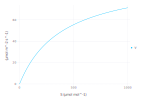

In [7]:
visualize(r, :S, :V; kind = :line)

We can use another form of `visualize()` for automatically running `simulate()` inside. A good thing about this approach is that we don't have to deal with custom expansion of configurations using `@config` in favor of convenient options like `xstep`. `xstep` indicates the range of a certain parameter value that needs to be simulated individually to make a series of consecutive output. Here we change the value of `Km` from 0 to 10 with an increment of 0.1 by simply providing a snippet of range value (`:0 => :Km => 0:0.1:10`) representing 101 times of simulation. Common plotting options like `kind` are also available.

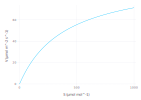

In [8]:
visualize(MichaelisMenten, :S, :V;
    xstep = :0 => :S => 0:1000,
    kind = :line,
)
# ci > 잎 세포 사이사이에 있는 co2

### Ex 5.2

In this exercise, you will answer Q 5.5 using Julia (or R or Python or any computer tool of your choice).
- Get an analytical solution for Eqn[5.4]
- Create a function to get numerical solutions using Gaussian two-point and three-point integration methods.

- Eqn 5.4

$$
\int_0^{\pi} \sin{x} \, dx
$$

#### Analytical solution

In [9]:
f′(x) = sin(x)
f(x) = -cos(x)
f(π) - f(0)

2.0

#### Gaussian two-point integration method

As the two points (-1/√3, +1/√3) and weights (1 for both) are defined in a normalized interval [-1, 1], we need to shift and scale them to the interval that our problem lies on, [0, π]. This process is shown step by step below.

##### [-1, 1]

In [10]:
(1 * f′(-1/√3) + 1 * f′(1/√3)) * 2/2

0.0

##### [0, 2]

In [28]:
(1 * f′(-1/√3 + 1) + 1 * f′(1/√3 + 1)) * 2/2

1.4101569816653807

##### [0, 1]

In [30]:
(1 * f′((-1/√3 + 1) / 2) + 1 * f′((1/√3 + 1) / 2)) * 1/2

0.45958781239526497

##### [0, π]

In [33]:
(1 * f′((-1/√3 + 1) / 2 * π) + 1 * f′((1/√3 + 1) / 2 * π)) * π/2

1.9358195746511373

#### Gaussian three-point integration method

In [34]:
(5/9 * f′((-√(3/5) + 1) / 2 * π) + 8/9 * f′((0 + 1)/2 * π) + 5/9 * f′((√(3/5) + 1) / 2 * π)) * π/2

2.0013889136077436

Calculation of Gaussian quadrature can be more easily done via a dedicated package called [QuadGK.jl](https://github.com/JuliaMath/QuadGK.jl) which is already imported inside Cropbox.

In [35]:
X, W = Cropbox.QuadGK.gauss(2, 0, pi)
sum(W .* f′.(X))

1.9358195746511364

In [36]:
X, W = Cropbox.QuadGK.gauss(3, 0, pi)
sum(W .* f′.(X))

2.0013889136077427

### Ex 5.3

Using Cropbox package, create a function to predict leaf net photosynthesis ($A$) as a function of irradiance ($I$) that takes parameters of photochemical efficiency ($\alpha$), the maximum photosynthetic rate at saturating light ($A_{\mathrm{max}}$), and dark respiration rate ($R_d$).
- Based on rectangular hyperbola (Eqn[5.11])
- Based on non-rectangular hyperbola (Eqn[5.12] for $0 < \theta \leq 1$)
- Using the parameter values in 5.1, plot the light response curves of both functions from 0 to 2000 $\mathrm{\mu mol}\ \mathrm{m^{-2}}\ \mathrm{s^{-1}}$ of photosynthetic photon flux density (PFD).
- Evaluate the sensitivity of non-rectangular hyperbola to $\theta$ graphically and discuss.

#### Rectangular hyperbola

- Eqn 5.11

$$
\begin{align}
A_g &= \frac{\alpha I A_{\mathrm{max}}}{\alpha I + A_{\mathrm{max}}} \\
A_n &= A_g - R_d
\end{align}
$$

- Table 5.1

| Symbol | Value | Units | Description |
|:-------|:------|:------|:------------|
| $\alpha$ | 0.05 | $$\mathrm{\mu mol_{CO_2}}\ \mathrm{\mu mol_{photon}^{-1}}$$ | Apparent photochemical efficiency (*a.k.a.* quantum yield) |
| $A_{\mathrm{max}}$ | 25.0 | $\mathrm{\mu mol}\ \mathrm{m^{-2}}\ \mathrm{s^{-1}}$ | Light saturated $A_g$ at ambient $\mathrm{[CO_2]}$ and standard temperature |
| $R_d$ | 1.0, 40 | $\mathrm{\mu mol_{CO_2}}\ \mathrm{m^{-2}}\ \mathrm{s^{-1}}$ | Leaf mitochondrial respiration rate at 25 $\mathrm{^{\circ}C}$ |

- Table 5.1

| Symbol | Units | Description |
|:-------|:------|:------------|
| $I$ | $\mathrm{\mu mol_{photon}}\ \mathrm{m^{-2}}$ | Incident PAR on leaf surface |
| $A_g$ | $$\mathrm{\mu mol_{CO_2}}\ \mathrm{m^{-2}}\ \mathrm{s^{-1}}$$ | Leaf gross $\mathrm{CO_2}$ assimilation rate 
| $A_n$ | $\mathrm{\mu mol_{CO_2}}\ \mathrm{m^{-2}}\ \mathrm{s^{-1}}$ | Leaf net $\mathrm{CO_2}$ assimilation rate |

We first define a mix-in system named `Photosynthesis` which provides a shared template of photosynthesis model which other models will be all based on.

We have three common parameters and two variables representing photosynthesis rate. $A_n$ is the net photosynthesis derived from gross photosynthesis ($A_g$) and respiration ($R_d$). As we decided to make $R_d$ a constant parameter, subsequent models would only need to provide a custom definition for $A_g$. Although `Ag` is not defined here, it is still a dependency of `An` and thus we need to make a placeholder for it by creating a `hold` variable. For declaring `hold`, only a name and an optinal alias of the variable are needed. Any variables with `hold` state should be properly defined later in another system which embeds `Photosynthesis` as a mix-in.

In [37]:
@system Photosynthesis begin
    α:    photochemical_efficiency    => 0.05 ~ preserve(parameter)
    Amax: maximum_photosynthetic_rate => 25   ~ preserve(parameter, u"μmol/m^2/s")
    Rd:   dark_respiration            => 1.0  ~ preserve(parameter, u"μmol/m^2/s")

    Ag: gross_photosynthesis ~ hold

    An(Ag, Rd): net_photosynthesis => Ag - Rd ~ track(u"μmol/m^2/s")
end

Photosynthesis

Here is our first model based on rectangular hyperbola named `PhotosynthesisRH` which consists of two mix-ins, `Photosynthesis` and `Controller`. As you remember, `Controller` is a mix-in that makes a top-level system which can be instantiated by `instance()` or `simulate()`. Note that variables from other mix-in that are used by the system should be declared as `hold` kind of variable to ensure correct bindings between variables. Note that `PhotosynthesisRH` now has a concrete definition of `Ag` with an introduction of additional parameter `I`.

In [38]:
@system PhotosynthesisRH(Photosynthesis, Controller) begin
    I: irradiance => 0 ~ preserve(parameter, u"μmol/m^2/s")

    Ag(I, α, Amax): gross_photosynthesis => begin
        (I * α * Amax) / (I * α + Amax)
    end ~ track(u"μmol/m^2/s")
end

PhotosynthesisRH

We use `visualize()` with a range of `I` value set up for `xstep` in the same way as we saw earlier.

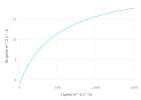

In [39]:
visualize(PhotosynthesisRH, :I, :An;
    xstep = :0 => :I => 0:1500,
    kind = :line,
)

#### Non-rectangular hyperbola

- Eqn 5.12

$$
A_g = \frac{\alpha I + A_{\mathrm{max}} - \sqrt{(\alpha I + A_{\mathrm{max}})^2 - 4\theta\alpha I A_{\mathrm{max}}}}{2\theta} \\
$$

- Table 5.1

| Symbol | Value | Units | Description |
|:-------|:------|:------|:------------|
| $\theta$ | 0.7 | - | Curvature determining transition between light-limited and saturated photosynthesis |

Another variant of the model using non-rectangular hyperbola looks similar to the rectangular model we built earlier, except the addition of new parameter `θ` controlling curvature of transition.

In [40]:
@system PhotosynthesisNRH(Photosynthesis, Controller) begin
    θ: transition_curvature => 0.7 ~ preserve(parameter)
    I: irradiance           => 0   ~ preserve(parameter, u"μmol/m^2/s")

    Ag(I, α, Amax, θ): gross_photosynthesis => begin
        ((I * α + Amax) - √(((I * α + Amax)^2) - 4 * θ * I * α * Amax)) / 2 * θ
    end ~ track(u"μmol/m^2/s")
end

PhotosynthesisNRH

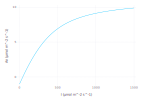

In [41]:
visualize(PhotosynthesisNRH, :I, :An;
    xstep = :0 => :I => 0:1500,
    kind = :line,
)

By the way, instead of solving the quadratic equation for $A_g$ manually as we did above, we can use `solve` variable to let the framework automatically figure it out. In such case, we can use Eqn[5.9] almost as is. When multiple solutions exist, we may need to provide an extra information to guide a solution. Here we may specify a sensible range of $A_g$ from 0 to $A_{\mathrm{max}}$ with `lower` and `upper` tags.

- Eqn 5.9.

$$
\theta A_g^2 - (\alpha I + A_{\mathrm{max}}) A_g + \alpha I A_{\mathrm{max}} = 0
$$

In [42]:
@system PhotosynthesisNRH2(Photosynthesis, Controller) begin
    θ: transition_curvature => 0.7 ~ preserve(parameter)
    I: irradiance           => 0   ~ preserve(parameter, u"μmol/m^2/s")

    Ag(Ag, θ, I, α, Amax): gross_photosynthesis => begin
        θ*Ag^2 - (α*I + Amax)*Ag + α*I*Amax
    end ~ solve(pick = :minimum, u"μmol/m^2/s")
end

PhotosynthesisNRH2

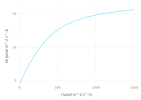

In [43]:
visualize(PhotosynthesisNRH2, :I, :An;
    xstep = :0 => :I => 0:1500,
    kind = :line,
)

#### Sensitivity of θ

So far we've only made plots with a single line composed of a series of points from multiple simulations triggered by `xstep` option. For drawing multiple lines of simulations for non-rectangular hyperbola, we use `group` option to control another parameter value in the system. For testing sensitivity of `θ`, we want to run simulations with different values of `θ` from 0.2 to 1.0 by increment of 0.2. For convenience of the reader, we use a parameter list in reverse order (`[1, 0.99, 0.9, 0.7, 0.4]`) to show the labels from top to bottom. Additionally, we append a plot for the rectangular hyperbola obtained when `θ` is 0.

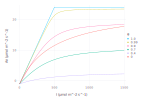

In [44]:
let x = :I, y = :An,
    xstep = :0 => :I => 0:10:1500,
    group = :0 => :θ => [1, 0.99, 0.9, 0.7, 0.4],
    kind = :line
    p = visualize(PhotosynthesisNRH, x, y; group, xstep, kind)
    visualize!(p, PhotosynthesisRH, x, y; xstep, kind, name = "0")
end

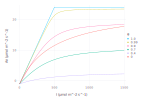

In [25]:
let x = :I, y = :An,
    xstep = :0 => :I => 0:10:1500,
    group = :0 => :θ => [1, 0.99, 0.9, 0.7, 0.4],
    kind = :line
    p = visualize(PhotosynthesisNRH, x, y; group, xstep, kind)
    visualize!(p, PhotosynthesisRH, x, y; xstep, kind, name = "0")
end

In [45]:
manipulate(PhotosynthesisNRH2, :I, :An;
    parameters = :0 => :θ => 0.01:0.01:1,
    xstep = :0 => :I => 0:10:1500,
    ylim = (-10, 30),
    kind = :line,
)

WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any["0"], Dict{Symbol, Any}(:style => Dict{String, Any}("color" => :rebeccapurple, "font-family" => "monospace"))), WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Scope(WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["θ"], Dict{Symbol, Any}(:className => "interact ", :style => Dict{Any, Any}(:padding => "5px 10px 0px 10px", "white-space" => :nowrap, "color" => :royalblue)))], Dict{Symbol, Any}(:className => "interact-flex-row-left")), WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol, Any}(:max => 100, :min => 1, :attributes => Dict{Any, Any}(:type => "range", Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}", "orient" => "horizontal"), :step => 1, :className => "slider slider is-fullwidth", :style => Dict{Any, Any}()))], Dict{Symbol, Any}(:className => "interact-flex-row-center")), WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol, Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol, Any}(:className => "interact-flex-row-right"))], Dict{Symbol, Any}(:className => "interact-flex-row interact-widget", :style => Dict("font-family" => "monospace", "width" => "80%"))), Dict{String, Tuple{Observables.AbstractObservable, Union{Nothing, Bool}}}("changes" => (Observable(0), nothing), "index" => (Observable{Any}(50), nothing)), Set{String}(), nothing, WebIO.Asset[WebIO.Asset("js", "knockout", "/opt/julia/packages/Knockout/HReiN/src/../assets/knockout.js"), WebIO.Asset("js", "knockout_punches", "/opt/julia/packages/Knockout/HReiN/src/../assets/knockout_punches.js"), WebIO.Asset("js", nothing, "/opt/julia/packages/InteractBase/LJXv3/src/../assets/all.js"), WebIO.Asset("css", nothing, "/opt/julia/packages/InteractBase/LJXv3/src/../assets/style.css"), WebIO.Asset("css", nothing, "/opt/julia/packages/Interact/PENUy/src/../assets/bulma_confined.min.css")], Dict{Any, Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")], "index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(32), Set{WebIO.AbstractConnection}(), Base.GenericCondition{ReentrantLock}(Base.IntrusiveLinkedList{Task}(Task (runnable) @0x00007f261c081910, Task (runnable) @0x00007f261c081910), ReentrantLock(nothing, 0x00000000, 0x00, Base.GenericCondition{Base.Threads.SpinLock}(Base.IntrusiveLinkedList{Task}(nothing, nothing), Base.Threads.SpinLock(0)), (8, 0, 139803315965360)))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringif